## Problem 2 - Analysis of some solutions found

We will consider to analyze the following solutions:
    
* Solution with the lowest cost
* Solution with the highest cost
* Solution with lowest numer of iterations
* Solution with the higher number of iterations

In [1]:
from openqaoa.problems import Knapsack
knapsack_prob = Knapsack(values=[2, 3, 4, 1, 1],weights=[1, 1, 4, 3, 2],weight_capacity=9,penalty=8)
print(knapsack_prob.problem_instance)
knapsack_qubo = knapsack_prob.qubo
knapsack_hamiltonian = knapsack_qubo.hamiltonian

{'problem_type': 'knapsack', 'values': [2, 3, 4, 1, 1], 'weights': [1, 1, 4, 3, 2], 'weight_capacity': 9, 'penalty': 8, 'n_items': 5}


In [2]:
{'problem_type': 'knapsack', 'values': [2, 3, 4, 1, 1], 'weights': [1, 1, 4, 3, 2], 'weight_capacity': 9, 'penalty': 8, 'n_items': 5}

{'problem_type': 'knapsack',
 'values': [2, 3, 4, 1, 1],
 'weights': [1, 1, 4, 3, 2],
 'weight_capacity': 9,
 'penalty': 8,
 'n_items': 5}

### Solution using brute force

In [3]:
from openqaoa.utilities import ground_state_hamiltonian
energy, configuration = ground_state_hamiltonian(knapsack_hamiltonian)
print(f"The solutions found with brute force are {configuration} with an energy of {energy}")

The solutions found with brute force are ['000011110', '100011101'] with an energy of -10.0


### Solution with lowest cost:
#### 3-standard-rand-x-Powell

In [4]:
import json
from openqaoa.algorithms import QAOAResult
from openqaoa.qaoa_components import Hamiltonian

with open('../../exp1/problem2/prob2_3-standard-rand-x-Powell.json', 'r') as file:
    data = json.load(file)
cost_hamiltonian = data['cost_hamiltonian']
cost_hamiltonian = Hamiltonian.classical_hamiltonian(knapsack_qubo.terms,cost_hamiltonian['coeffs'],cost_hamiltonian['constant'])

result = QAOAResult.from_dict(data,cost_hamiltonian)

In [5]:
#result.asdict()

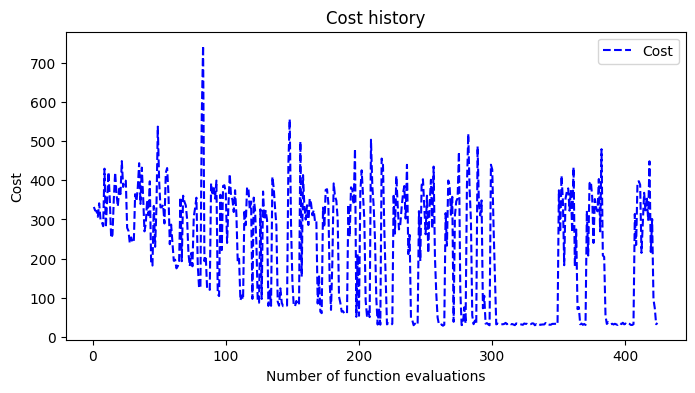

In [6]:
result.plot_cost(figsize=(8,4))

states kept: 40


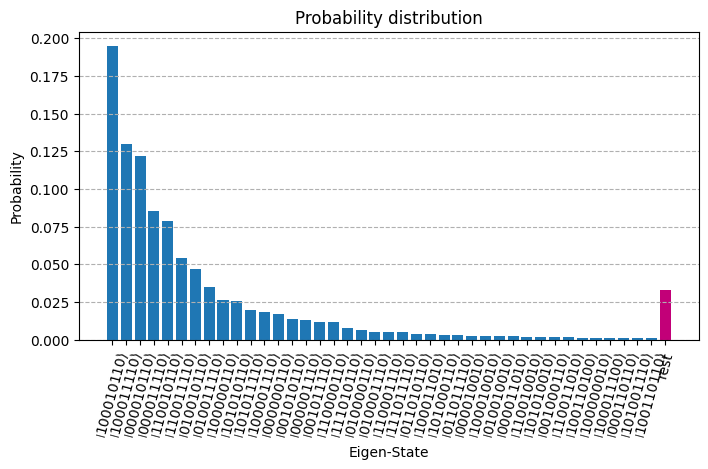

In [7]:
result.plot_probabilities(figsize=(8,4))

In [8]:
print(f"The solutions found with brute force are {configuration} with an energy of {energy}")
print()

most_probable_states = ''
#display( result.most_probable_states)
for i in result.most_probable_states['solutions_bitstrings']:
    most_probable_states += i + ','
most_probable_states = most_probable_states[:-1]
print('The most probable state/s are',most_probable_states,'with an energy of',result.most_probable_states['bitstring_energy'])
print()

lowest_cost_bitstrings = result.lowest_cost_bitstrings(2)
#display(lowest_cost_bitstrings)
for i in range(2):
    print('One of the lowest cost bitstring is',lowest_cost_bitstrings['solutions_bitstrings'][i],'with an energy of',
          lowest_cost_bitstrings['bitstrings_energies'][i],'and prob. of occurance of', lowest_cost_bitstrings['probabilities'][i])
    print()

The solutions found with brute force are ['000011110', '100011101'] with an energy of -10.0

The most probable state/s are 100010110 with an energy of -7.0

One of the lowest cost bitstring is 000011110 with an energy of -10.0 and prob. of occurance of 0.0856

One of the lowest cost bitstring is 110011100 with an energy of -9.0 and prob. of occurance of 0.0006



### Solution with highest cost:
#### 3-annealing-rand-xy-COBYLA

In [9]:
import json
from openqaoa.algorithms import QAOAResult
from openqaoa.qaoa_components import Hamiltonian

with open('../../exp1/problem2/prob2_3-annealing-rand-xy-Cobyla.json', 'r') as file:
    data = json.load(file)
cost_hamiltonian = data['cost_hamiltonian']
cost_hamiltonian = Hamiltonian.classical_hamiltonian(knapsack_qubo.terms,cost_hamiltonian['coeffs'],cost_hamiltonian['constant'])

result = QAOAResult.from_dict(data,cost_hamiltonian)

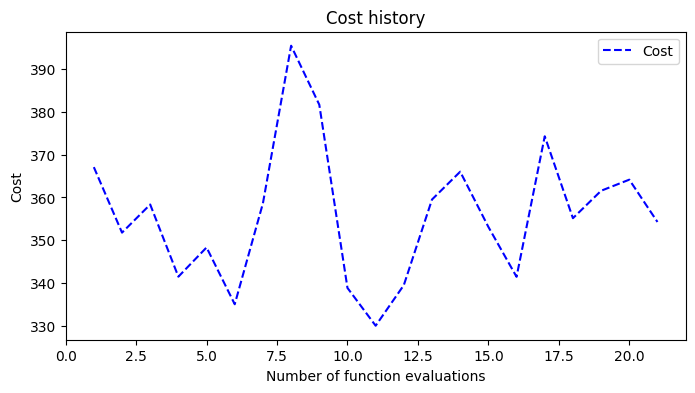

In [10]:
result.plot_cost(figsize=(8,4))

states kept: 40


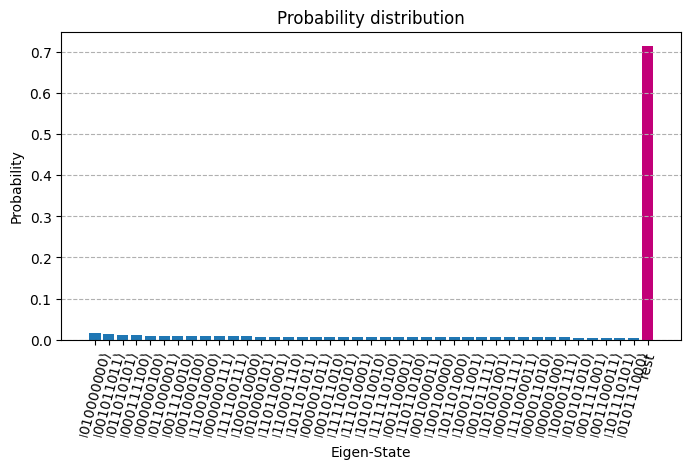

In [11]:
result.plot_probabilities(figsize=(8,4))

In [12]:
print(f"The solutions found with brute force are {configuration} with an energy of {energy}")
print()

most_probable_states = ''
#display( result.most_probable_states)
for i in result.most_probable_states['solutions_bitstrings']:
    most_probable_states += i + ','
most_probable_states = most_probable_states[:-1]
print('The most probable state/s are',most_probable_states,'with an energy of',result.most_probable_states['bitstring_energy'])
print()

lowest_cost_bitstrings = result.lowest_cost_bitstrings(2)
#display(lowest_cost_bitstrings)
for i in range(2):
    print('One of the lowest cost bitstring is',lowest_cost_bitstrings['solutions_bitstrings'][i],'with an energy of',
          lowest_cost_bitstrings['bitstrings_energies'][i],'and prob. of occurance of', lowest_cost_bitstrings['probabilities'][i])
    print()

The solutions found with brute force are ['000011110', '100011101'] with an energy of -10.0

The most probable state/s are 010000000 with an energy of 392.0

One of the lowest cost bitstring is 000011110 with an energy of -10.0 and prob. of occurance of 0.0008

One of the lowest cost bitstring is 100011101 with an energy of -10.0 and prob. of occurance of 0.0012



The lowest cost bitstring agrees with the brute force solutions.

### Solution with lowest amount of iterations:
#### 3-annealing-ramp-xy-COBYLA

In [13]:
import json
from openqaoa.algorithms import QAOAResult
from openqaoa.qaoa_components import Hamiltonian

with open('../../exp1/problem2/prob2_3-annealing-ramp-xy-COBYLA.json', 'r') as file:
    data = json.load(file)
cost_hamiltonian = data['cost_hamiltonian']
cost_hamiltonian = Hamiltonian.classical_hamiltonian(knapsack_qubo.terms,cost_hamiltonian['coeffs'],cost_hamiltonian['constant'])

result = QAOAResult.from_dict(data,cost_hamiltonian)

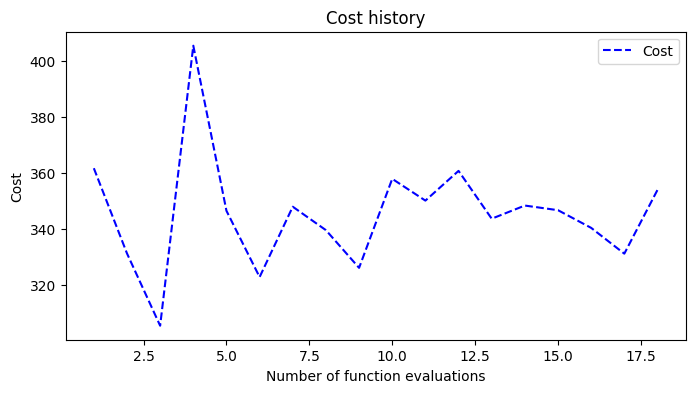

In [14]:
result.plot_cost(figsize=(8,4))

states kept: 40


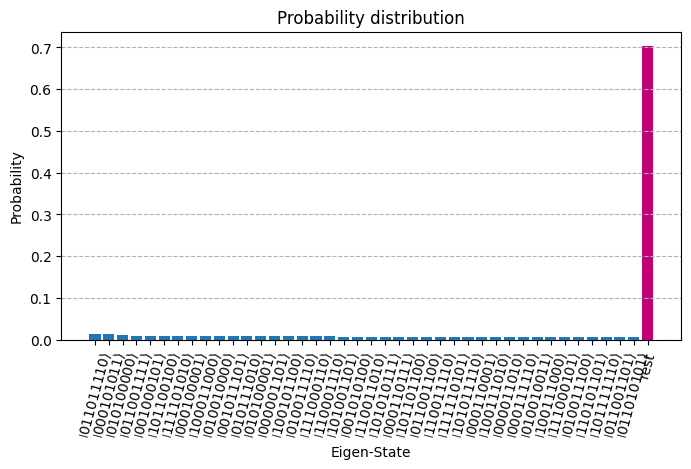

In [15]:
result.plot_probabilities(figsize=(8,4))

In [16]:
print(f"The solutions found with brute force are {configuration} with an energy of {energy}")
print()

most_probable_states = ''
#display( result.most_probable_states)
for i in result.most_probable_states['solutions_bitstrings']:
    most_probable_states += i + ','
most_probable_states = most_probable_states[:-1]
print('The most probable state/s are',most_probable_states,'with an energy of',result.most_probable_states['bitstring_energy'])
print()

lowest_cost_bitstrings = result.lowest_cost_bitstrings(2)
#display(lowest_cost_bitstrings)
for i in range(2):
    print('One of the lowest cost bitstring is',lowest_cost_bitstrings['solutions_bitstrings'][i],'with an energy of',
          lowest_cost_bitstrings['bitstrings_energies'][i],'and prob. of occurance of', lowest_cost_bitstrings['probabilities'][i])
    print()

The solutions found with brute force are ['000011110', '100011101'] with an energy of -10.0

The most probable state/s are 011011110 with an energy of 278.0

One of the lowest cost bitstring is 100011101 with an energy of -10.0 and prob. of occurance of 0.0024

One of the lowest cost bitstring is 000011110 with an energy of -10.0 and prob. of occurance of 0.0008



### Solution with highest amount of iterations:
#### 4-standard-ramp-x-Powell

In [17]:
import json
from openqaoa.algorithms import QAOAResult
from openqaoa.qaoa_components import Hamiltonian

with open('../../exp1/problem2/prob2_5-standard-rand-x-Powell.json', 'r') as file:
    data = json.load(file)
cost_hamiltonian = data['cost_hamiltonian']
cost_hamiltonian = Hamiltonian.classical_hamiltonian(knapsack_qubo.terms,cost_hamiltonian['coeffs'],cost_hamiltonian['constant'])

result = QAOAResult.from_dict(data,cost_hamiltonian)

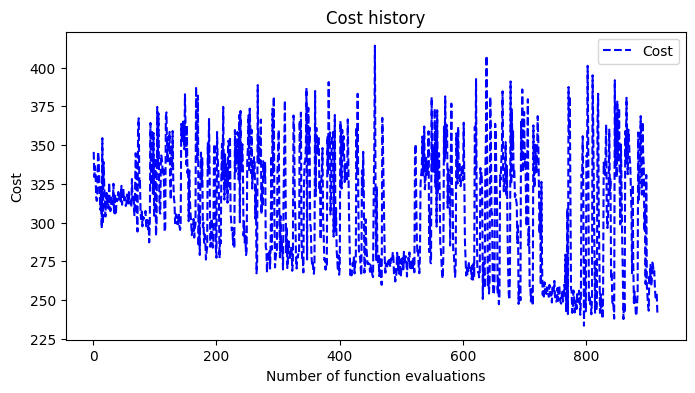

In [18]:
result.plot_cost(figsize=(8,4))

states kept: 40


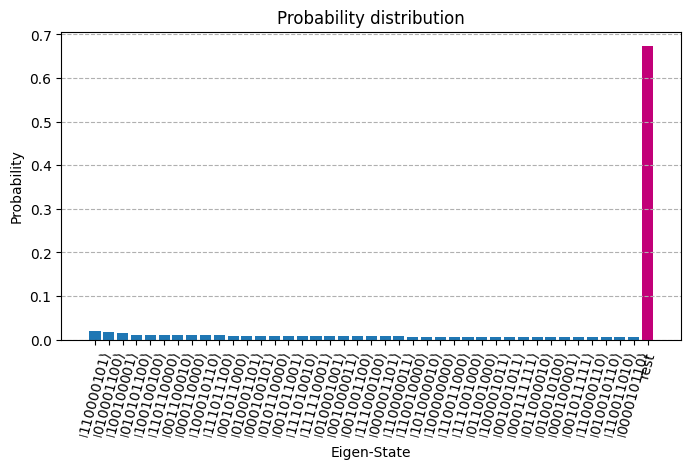

In [19]:
result.plot_probabilities(figsize=(8,4))

In [20]:
print(f"The solutions found with brute force are {configuration} with an energy of {energy}")
print()

most_probable_states = ''
#display( result.most_probable_states)
for i in result.most_probable_states['solutions_bitstrings']:
    most_probable_states += i + ','
most_probable_states = most_probable_states[:-1]
print('The most probable state/s are',most_probable_states,'with an energy of',result.most_probable_states['bitstring_energy'])
print()

lowest_cost_bitstrings = result.lowest_cost_bitstrings(2)
#display(lowest_cost_bitstrings)
for i in range(2):
    print('One of the lowest cost bitstring is',lowest_cost_bitstrings['solutions_bitstrings'][i],'with an energy of',
          lowest_cost_bitstrings['bitstrings_energies'][i],'and prob. of occurance of', lowest_cost_bitstrings['probabilities'][i])
    print()

The solutions found with brute force are ['000011110', '100011101'] with an energy of -10.0

The most probable state/s are 110000101 with an energy of -5.0

One of the lowest cost bitstring is 100011101 with an energy of -10.0 and prob. of occurance of 0.0004

One of the lowest cost bitstring is 110011100 with an energy of -9.0 and prob. of occurance of 0.0006

